In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression


# Data

In [5]:
datasetWine = pd.read_csv("./winequality-red.csv")
datasetWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Quality distribution
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
Low quality [3-5]: 0.465291%
High quality [6-8]: 0.534709%



<AxesSubplot:>

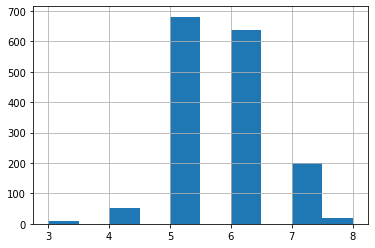

In [20]:
print('Quality distribution')
quality = datasetWine['quality'].value_counts()
print(quality)
print('Low quality [3-5]: {0:f}%'.format(sum([quality[i] for i in range(3,6)])/len(datasetWine)))
print('High quality [6-8]: {0:f}%'.format(sum([quality[i] for i in range(6,9)])/len(datasetWine)))
datasetWine['quality'].hist()

# Create labels
We make the labels. 0 if the quality is low and 1 if quality is high

In [29]:
Y = [[int(datasetWine['quality'][i] >5)] for i in range(len(datasetWine))]

# Visualization data features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


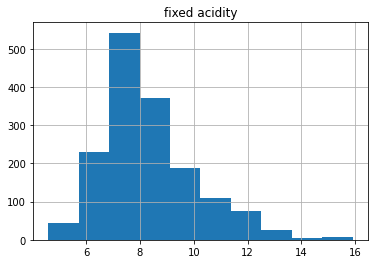

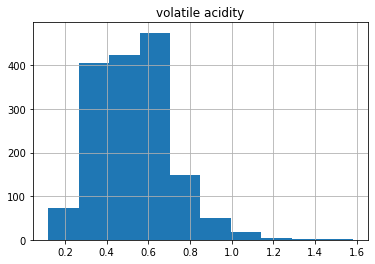

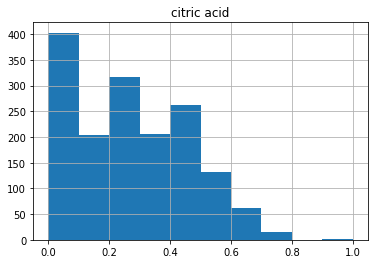

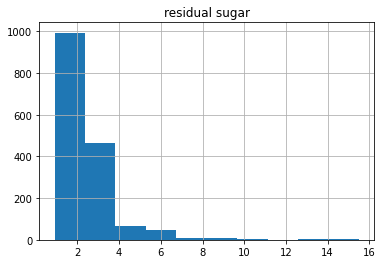

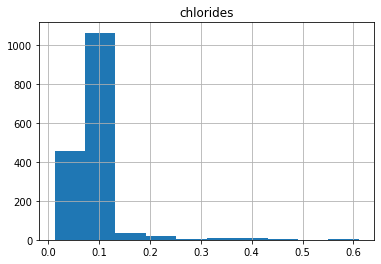

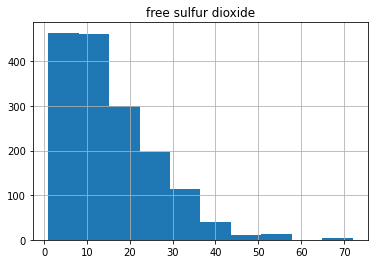

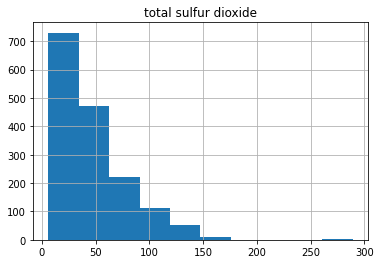

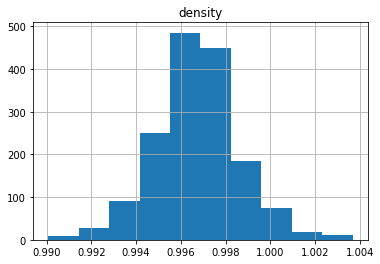

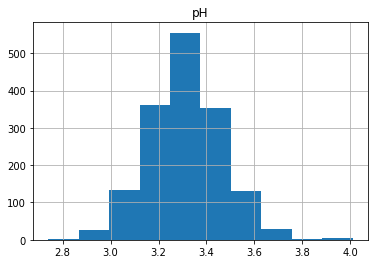

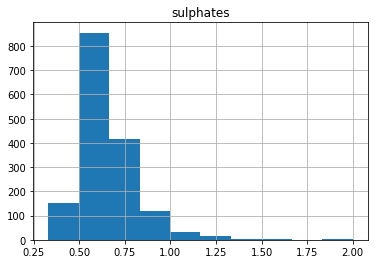

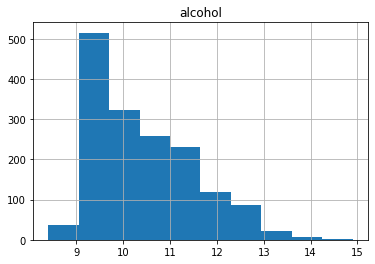

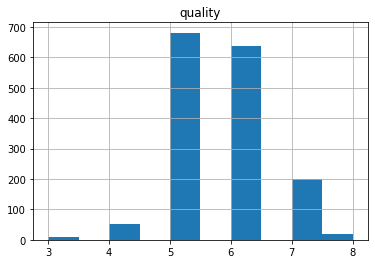

In [78]:
print(datasetWine.columns)
for feature in datasetWine.columns:
    
    datasetWine[feature].hist()
    plt.title(feature)
    plt.show()

# Normalize data

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


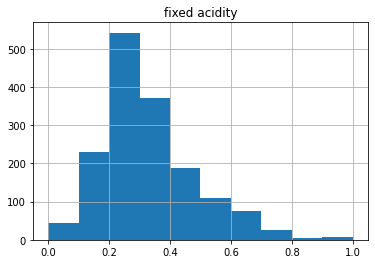

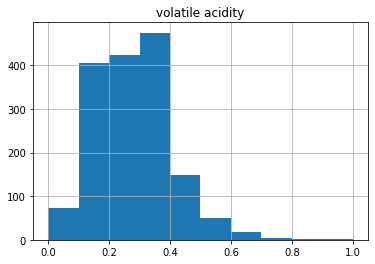

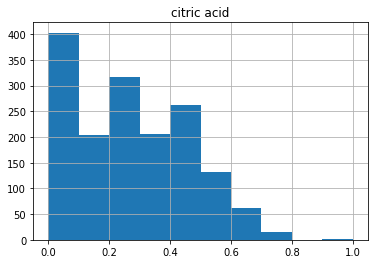

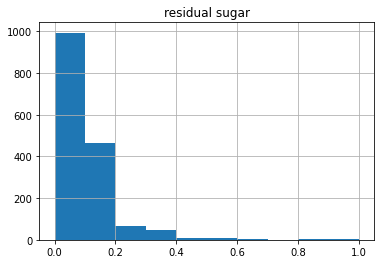

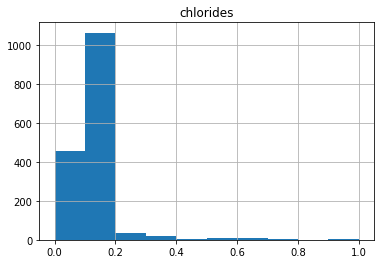

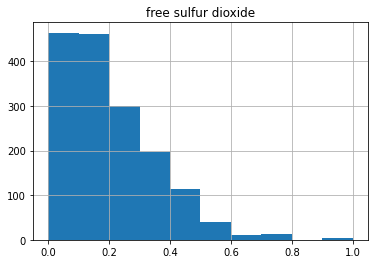

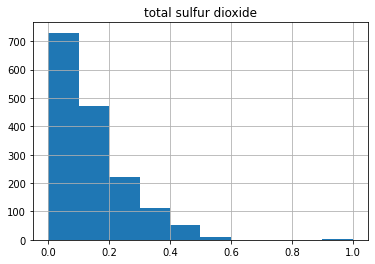

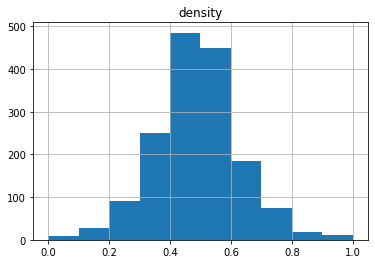

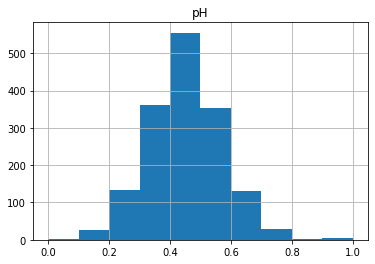

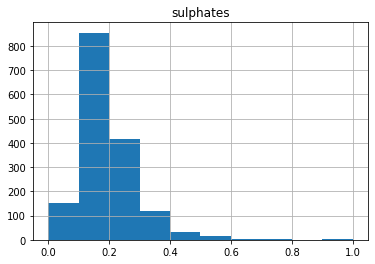

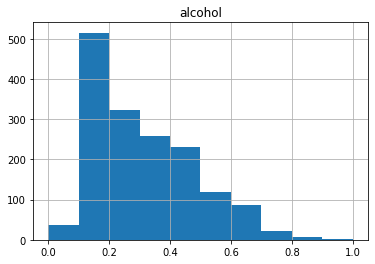

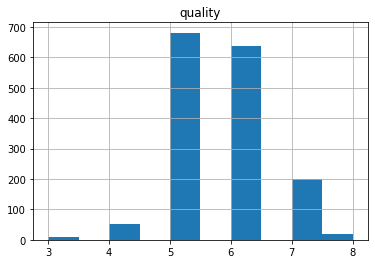

In [115]:
qualityColumnValues = datasetWine['quality']
x = datasetWine.values
min_max_scaler = preprocessing.MinMaxScaler()
x_normalized = min_max_scaler.fit_transform(x)
dataSetNormalized = pd.DataFrame(x_normalized, columns=datasetWine.columns)

#We do not need the quality normalization. It is the label.
dataSetNormalized['quality'] = qualityColumnValues
print(dataSetNormalized.columns)
for feature in dataSetNormalized.columns:
    
    dataSetNormalized[feature].hist()
    plt.title(feature)
    plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


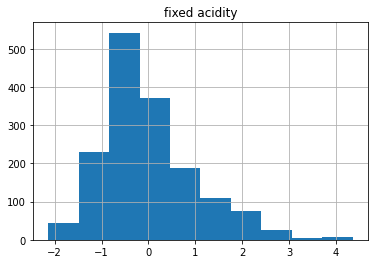

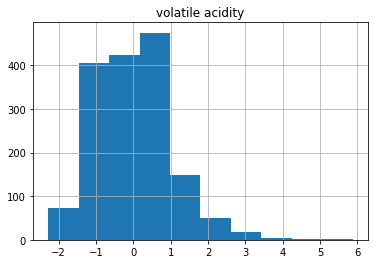

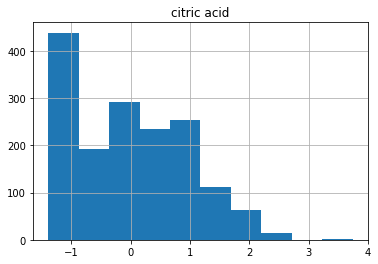

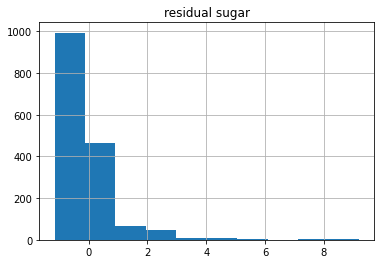

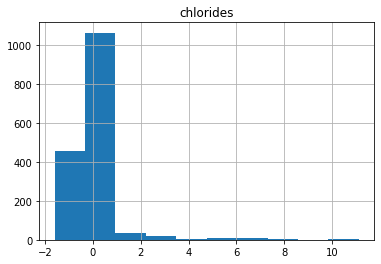

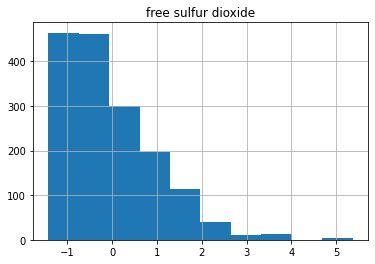

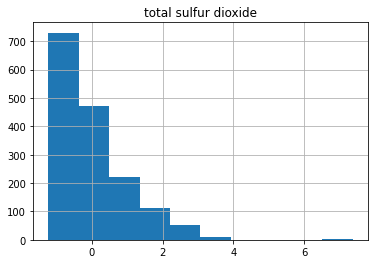

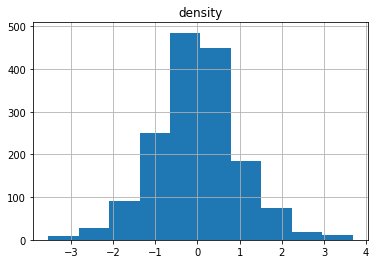

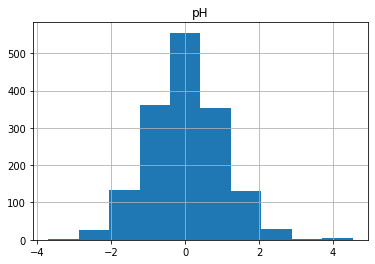

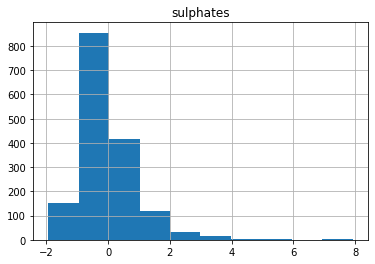

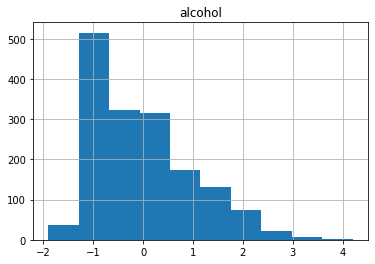

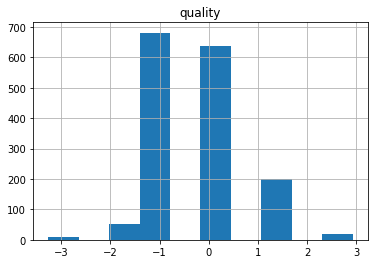

In [108]:
x = datasetWine.values
standarScaler = preprocessing.StandardScaler()
x_scaled = standarScaler.fit_transform(x)
dataSetScaled = pd.DataFrame(x_scaled, columns=datasetWine.columns)

print(dataSetScaled.columns)
for feature in dataSetScaled.columns:
    
    dataSetScaled[feature].hist()
    plt.title(feature)
    plt.show()

# Create train and test sets

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(dataSetNormalized, Y, test_size=0.2, train_size=0.8, stratify=Y, shuffle=True)

In [126]:
print("Training set distribution")
quality_X_train = X_train['quality'].value_counts()
print('Low quality [3-5]: {0:f}%'.format(sum([quality_X_train[i] for i in range(3,6)])/len(X_train)))
print('High quality [6-8]: {0:f}%'.format(sum([quality_X_train[i] for i in range(6,9)])/len(X_train)))
print('Training set size ', len(X_train))
print('Training set rate {0:f}%'.format(len(X_train)/len(dataSetNormalized)))

print('---------------------')
print("Test set distribution")
quality_X_test = X_test['quality'].value_counts()
print(quality_X_test)
print('Low quality [3-5]: {0:f}%'.format(sum([quality_X_test[i] for i in range(3,6)])/len(X_test)))
print('High quality [6-8]: {0:f}%'.format(sum([quality_X_test[i] for i in range(6,9)])/len(X_test)))
print('Test set size: ', len(X_test))
print('Training set rate: {0:f}%'.format(len(X_test)/len(dataSetNormalized)))

#Remove the quality column
X_train.drop('quality',axis='columns', inplace=True)
X_test.drop('quality',axis='columns', inplace=True)


Training set distribution
Low quality [3-5]: 0.465207%
High quality [6-8]: 0.534793%
Training set size  1279
Training set rate 0.799875%
---------------------
Test set distribution
5    135
6    122
7     47
4     13
8      2
3      1
Name: quality, dtype: int64
Low quality [3-5]: 0.465625%
High quality [6-8]: 0.534375%
Test set size:  320
Training set rate: 0.200125%
C:\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Logistic Regression

In [133]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, Y_train)
res = logisticRegression.score(X_test,Y_test)
print(res)

0.734375
C:\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
